In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/democracy-index-eiu.csv')

In [ ]:
df.head()

,Entity,Code,Year,Democracy score
0,Afghanistan,AFG,2006,3.06
1,Afghanistan,AFG,2008,3.02
2,Afghanistan,AFG,2010,2.48
3,Afghanistan,AFG,2011,2.48
4,Afghanistan,AFG,2012,2.48


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           2765 non-null   object 
 1   Code             2669 non-null   object 
 2   Year             2765 non-null   int64  
 3   Democracy score  2765 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 86.5+ KB


In [ ]:
south_american_countries = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
    "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
]

In [ ]:
df_filtered = df[df['Entity'].isin(south_american_countries)]

In [ ]:
df_filtered.head()

,Entity,Code,Year,Democracy score
79,Argentina,ARG,2006,6.63
80,Argentina,ARG,2008,6.63
81,Argentina,ARG,2010,6.84
82,Argentina,ARG,2011,6.84
83,Argentina,ARG,2012,6.84


In [ ]:
df_filtered.drop(columns=['Code'], inplace=True)
df_filtered.head()

<ipython-input-8-f4052e217401>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['Code'], inplace=True)


,Entity,Year,Democracy score
79,Argentina,2006,6.63
80,Argentina,2008,6.63
81,Argentina,2010,6.84
82,Argentina,2011,6.84
83,Argentina,2012,6.84


In [ ]:
year_filtered_df = df_filtered[(df_filtered['Year'] >= 2019) & (df_filtered['Year'] <= 2023)]
year_filtered_df.head(20)

,Entity,Year,Democracy score
90,Argentina,2019,7.02
91,Argentina,2020,6.95
92,Argentina,2021,6.81
93,Argentina,2022,6.85
94,Argentina,2023,6.62
281,Bolivia,2019,4.84
282,Bolivia,2020,5.08
283,Bolivia,2021,4.65
284,Bolivia,2022,4.51
285,Bolivia,2023,4.20


In [ ]:
year_filtered_df['Democracy change'] = year_filtered_df.groupby('Entity')['Democracy score'].diff()

<ipython-input-10-4b29f8682903>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_filtered_df['Democracy change'] = year_filtered_df.groupby('Entity')['Democracy score'].diff()


In [ ]:
year_filtered_df.head()

,Entity,Year,Democracy score,Democracy change
90,Argentina,2019,7.02,NaN
91,Argentina,2020,6.95,-0.07
92,Argentina,2021,6.81,-0.14
93,Argentina,2022,6.85,0.04
94,Argentina,2023,6.62,-0.23


In [ ]:
year_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 90 to 2685
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            60 non-null     object 
 1   Year              60 non-null     int64  
 2   Democracy score   60 non-null     float64
 3   Democracy change  48 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
average_change = year_filtered_df.groupby('Entity')['Democracy change'].mean().round(2)

In [ ]:
average_change

,Democracy change
Entity,
Argentina,-0.10
Bolivia,-0.16
Brazil,-0.05
Chile,-0.02
Colombia,-0.15
Ecuador,-0.23
Guyana,0.03
Paraguay,-0.06
Peru,-0.20


In [ ]:
average_democracy_america = year_filtered_df.groupby('Entity')['Democracy score'].mean().round(2)
average_democracy_america.sort_values()

,Democracy score
Entity,
Venezuela,2.46
Bolivia,4.66
Ecuador,5.85
Paraguay,6.03
Peru,6.19
Guyana,6.20
Colombia,6.78
Brazil,6.82
Argentina,6.85


In [ ]:
# We chose the countries depending on which one of them experienced coup in recent years (i.e., between 2019-2024) except DRC and Central African Republic, which were chosen
# because they are well known countries with lots of conflict historically.
african_countries = ['Mali', 'Burkina Faso', 'Niger', 'Chad', 'Guiena', 'Gabon', 'Sudan', 'Democratic Republic of Congo', 'Central African Republic']

In [ ]:
african_df = df[df['Entity'].isin(african_countries)]

In [ ]:
african_df.head()

,Entity,Code,Year,Democracy score
350,Burkina Faso,BFA,2006,3.72
351,Burkina Faso,BFA,2008,3.60
352,Burkina Faso,BFA,2010,3.59
353,Burkina Faso,BFA,2011,3.59
354,Burkina Faso,BFA,2012,3.52


In [ ]:
year_african_df = african_df[(african_df['Year'] >= 2019) & (african_df['Year'] <= 2023)]
year_african_df.head(10)

,Entity,Code,Year,Democracy score
361,Burkina Faso,BFA,2019,4.04
362,Burkina Faso,BFA,2020,3.73
363,Burkina Faso,BFA,2021,3.84
364,Burkina Faso,BFA,2022,3.08
365,Burkina Faso,BFA,2023,2.73
457,Central African Republic,CAF,2019,1.32
458,Central African Republic,CAF,2020,1.32
459,Central African Republic,CAF,2021,1.43
460,Central African Republic,CAF,2022,1.35
472,Chad,TCD,2019,1.61


In [ ]:
year_african_df.groupby('Entity')['Democracy score'].mean().round(2)

,Democracy score
Entity,
Burkina Faso,3.48
Central African Republic,1.36
Chad,1.62
Democratic Republic of Congo,1.28
Gabon,3.23
Mali,3.63
Niger,3.18
Sudan,2.54


In [ ]:
year_african_df['Democracy difference'] = year_african_df.groupby('Entity')['Democracy score'].diff()

<ipython-input-21-2633145c567d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_african_df['Democracy difference'] = year_african_df.groupby('Entity')['Democracy score'].diff()


In [ ]:
average_change_africa = year_african_df.groupby('Entity')['Democracy difference'].mean().round(2)
average_change_africa.sort_values()

,Democracy difference
Entity,
Mali,-0.58
Gabon,-0.36
Burkina Faso,-0.33
Niger,-0.23
Sudan,-0.08
Central African Republic,0.01
Chad,0.02
Democratic Republic of Congo,0.12


In [ ]:
bottom_america_df = year_filtered_df = year_filtered_df[year_filtered_df['Entity'].isin(['Venezuela', 'Bolivia', 'Ecuador'])]
bottom_africa_df = year_african_df[year_african_df['Entity'].isin(['Central African Republic', 'Chad', 'Democratic Republic of Congo'])]

In [ ]:
bottom_updated_df = pd.concat([bottom_america_df, bottom_africa_df], ignore_index=True)
bottom_updated_df.head()

,Entity,Year,Democracy score,Democracy change,Code,Democracy difference
0,Bolivia,2019,4.84,NaN,NaN,NaN
1,Bolivia,2020,5.08,0.24,NaN,NaN
2,Bolivia,2021,4.65,-0.43,NaN,NaN
3,Bolivia,2022,4.51,-0.14,NaN,NaN
4,Bolivia,2023,4.20,-0.31,NaN,NaN


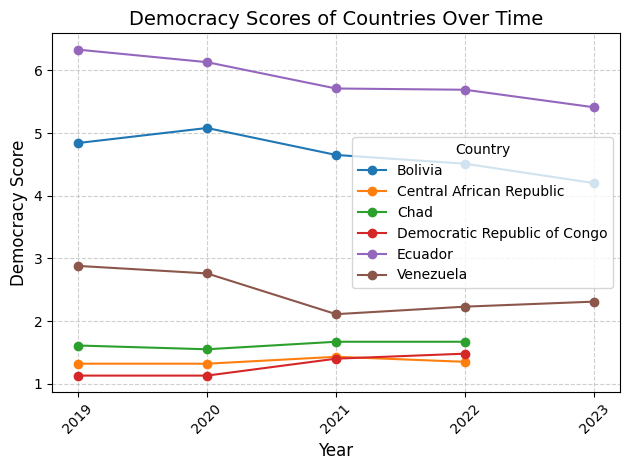

In [ ]:
bottom_updated_pivot = bottom_updated_df.pivot(index='Year', columns='Entity', values = 'Democracy score')
for country in bottom_updated_pivot.columns:
  plt.plot(bottom_updated_pivot.index, bottom_updated_pivot[country], marker='o', label=country)

# Add title and labels
plt.title("Democracy Scores of Countries Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Democracy Score", fontsize=12)
plt.xticks(bottom_updated_pivot.index, rotation=45)
plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()